In [1]:
#Unique columns in rounds2.csv 
import pandas as pd
filePath2=r"C:\Users\awx5324225\Documents\Upgrad_AI_ML\Assignment1\rounds2.csv"

# making data frame for rounds csv   
rounds_df = pd.read_csv(filePath2,encoding='latin-1')

# Removing non-ascii values from company_permalink column   
rounds_df.company_permalink=rounds_df.company_permalink.str.encode("ascii", "ignore").str.decode("ascii", "ignore") 

# Converting into lower case   
rounds_df.company_permalink = rounds_df.company_permalink.str.lower()

# Filtering with unique values in company_permalink column 
unique_companies_in_rounds_df = rounds_df.company_permalink.unique()

print("Total unique companies in rounds dataframe is :", len(unique_companies_in_rounds_df))

Total unique companies in rounds dataframe is : 66368


In [2]:
# Unique columns in companies.csv   
  
filePath1=r"C:\Users\awx5324225\Documents\Upgrad_AI_ML\Assignment1\companies.csv" 

# making data frame for companies csv   
companies_df = pd.read_csv(filePath1,encoding='latin-1')

# Removing non-ascii values from permalink column
companies_df.permalink=companies_df.permalink.str.encode("ascii", "ignore").str.decode("ascii", "ignore")

# Converting into lower case
companies_df.permalink = companies_df.permalink.str.lower()

# Filtering with unique values in permalink column
unique_companies_in_companies_df = companies_df.permalink.unique()

print("Total unique companies in companies dataframe is :",len(unique_companies_in_companies_df))

Total unique companies in companies dataframe is : 66368


In [3]:
#Merging 2 given dataframes
master_frame = pd.merge(rounds_df,companies_df,left_on='company_permalink',right_on='permalink',how='inner')
print("Total number of observations in master_frame is :",len(master_frame))

Total number of observations in master_frame is : 114949


In [4]:
#Finding whether columns in 2 data frames have same values or not.
not_present_values_count = len(set(unique_companies_in_rounds_df).symmetric_difference(set(unique_companies_in_companies_df))) 

if not_present_values_count==0:
    print("N")
else:
    print("Y")

N


In [5]:
#Finding average of raised_amount_usd using group by funding_round_type
df=master_frame.groupby(['funding_round_type']).mean()
print(df)

                       raised_amount_usd
funding_round_type                      
angel                       9.586945e+05
convertible_note            1.453439e+06
debt_financing              1.704353e+07
equity_crowdfunding         5.383682e+05
grant                       4.300576e+06
non_equity_assistance       4.112031e+05
post_ipo_debt               1.687046e+08
post_ipo_equity             8.218249e+07
private_equity              7.330859e+07
product_crowdfunding        1.363131e+06
secondary_market            7.964963e+07
seed                        7.198180e+05
undisclosed                 1.924237e+07
venture                     1.174891e+07


In [6]:
#For converting exponential type values into integer and checking which value lies between 5-15 Million USD
a=list()
b=list()
for i in df.raised_amount_usd:
    value=str(i).replace(',', '.')
    b.append(float(value))
print(b)
print()
for i in df.raised_amount_usd:
    value=str(i).replace(',', '.')
    a.append(float(value)/1000000)
print(a)
result = filter(lambda x: x>=5 and x<=15, a)
print(list(result))

[958694.4697530865, 1453438.5431928127, 17043526.023046993, 538368.2109120521, 4300576.33945386, 411203.05479452055, 168704571.8223684, 82182493.87101911, 73308593.02944215, 1363131.0699481866, 79649630.1, 719817.9969071728, 19242370.225663718, 11748914.30998029]

[0.9586944697530865, 1.4534385431928127, 17.043526023046994, 0.5383682109120521, 4.30057633945386, 0.4112030547945206, 168.70457182236842, 82.1824938710191, 73.30859302944215, 1.3631310699481867, 79.6496301, 0.7198179969071729, 19.242370225663716, 11.74891430998029]
[11.74891430998029]


In [7]:
#Finding top 9 countries with highest funding
Spark_Funds_df1=master_frame[master_frame.funding_round_type=='venture']
df=Spark_Funds_df1.groupby(['country_code']).sum()
print(df.sort_values(by=['raised_amount_usd'],ascending=False).head(9))
df_req=df.sort_values(by=['raised_amount_usd'],ascending=False).head(10)
print(df_req)

              raised_amount_usd
country_code                   
USA                4.225208e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09
              raised_amount_usd
country_code                   
USA                4.225208e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09
SWE                3.254953e+09


In [8]:
#Splitting the category_list column values into a single value
category_list1=list(master_frame['category_list'])
result=[str(x).split("|")[0] for x in category_list1]

In [9]:
#Filtering the df by funding_round_type and then by required country_code
master_frame['primary_sector']=pd.Series(result)
master_frame_map_FT=master_frame[master_frame.funding_round_type=='venture']

master_frame_map_filtered=master_frame_map_FT[master_frame_map_FT.country_code.isin(['USA','GBR','IND'])]

In [10]:
#Converting mapping.csv file into df
filePath3=r"C:\Users\awx5324225\Documents\Upgrad_AI_ML\Assignment1\mapping.csv" 
mapping_df = pd.read_csv(filePath3,encoding='latin-1')
#Dropping blank row
mapping_df.dropna(subset=['category_list'], inplace=True)
#Dropping Blanks column
mapping_df=mapping_df.drop(columns='Blanks')


In [11]:
#Merging master_frame and mapping_df given dataframes and getting the untimate final df
master_frame_map = pd.merge(master_frame,mapping_df,left_on='primary_sector',right_on='category_list',how='inner')


In [12]:
#Function to write the main_sector column
def main_sector(row):
   if row['Automotive & Sports']== 1 :
      return 'Automotive & Sports'
   if row['Cleantech / Semiconductors']==1 :
      return 'Cleantech / Semiconductors'
   if row['Entertainment']== 1 :
      return 'Entertainment'
   if row['Health']== 1:
      return 'Health'
   if row['Manufacturing']== 1:
      return 'Manufacturing'
   if row['News, Search and Messaging']== 1:
      return 'News, Search and Messaging'
   if row['Others']== 1:
      return 'Others'
   if row['Social, Finance, Analytics, Advertising']== 1:
      return 'Social, Finance, Analytics, Advertising'
   return 'Nan'
master_frame_map['main_sector'] = master_frame_map.apply (lambda row: main_sector(row), axis=1)
#Dropping the binary valued column
master_frame_map_drop=master_frame_map.drop(master_frame_map.columns.to_series()["Automotive & Sports":"Social, Finance, Analytics, Advertising"], axis=1)
#Filtering the final df first by required FT then by C1,C2 and C3
master_frame_map_FT=master_frame_map_drop[master_frame_map_drop.funding_round_type=='venture']
master_frame_map_selCon=master_frame_map_FT[master_frame_map_FT.country_code.isin(['USA','GBR','IND'])]

#Dividing master_frame_map_selCon df into requied country based dfs
df_USA=master_frame_map_selCon.loc[master_frame_map_selCon['country_code']=='USA']
df_GBR=master_frame_map_selCon.loc[master_frame_map_selCon['country_code']=='GBR']
df_IND=master_frame_map_selCon.loc[master_frame_map_selCon['country_code']=='IND']


In [13]:
#Finding the suma nd count of resp. main_sector for USA
USA_grp=df_USA.groupby(['main_sector'])
df_USA_final=pd.DataFrame(USA_grp['raised_amount_usd'].agg(['sum','count']))
print(df_USA_final)

                                                  sum  count
main_sector                                                 
Automotive & Sports                      1.163216e+10    505
Cleantech / Semiconductors               1.187644e+11   7849
Entertainment                            1.656783e+10   1756
Health                                   3.166093e+10   3263
Manufacturing                            2.484532e+10   2453
News, Search and Messaging               4.462932e+10   4302
Others                                   8.208458e+10   8243
Social, Finance, Analytics, Advertising  6.206299e+10   5156


In [14]:
#Finding the suma nd count of resp. main_sector for GBR
GBR_grp=df_GBR.groupby(['main_sector'])
df_GBR_final=pd.DataFrame(GBR_grp['raised_amount_usd'].agg(['sum','count']))
print(df_GBR_final)

                                                  sum  count
main_sector                                                 
Automotive & Sports                      4.808787e+08     44
Cleantech / Semiconductors               5.028729e+09    433
Entertainment                            1.141281e+09    133
Health                                   1.046655e+09    118
Manufacturing                            1.019283e+09    122
News, Search and Messaging               2.956024e+09    241
Others                                   4.400423e+09    507
Social, Finance, Analytics, Advertising  2.851116e+09    318


In [15]:
#Finding the suma nd count of resp. main_sector for IND
IND_grp=df_IND.groupby(['main_sector'])
df_IND_final=pd.DataFrame(IND_grp['raised_amount_usd'].agg(['sum','count']))
print(df_IND_final)

                                                  sum  count
main_sector                                                 
Automotive & Sports                      1.556350e+09     31
Cleantech / Semiconductors               7.864446e+08     54
Entertainment                            9.757053e+08     75
Health                                   5.643700e+08     42
Manufacturing                            7.302600e+08     55
News, Search and Messaging               1.739580e+09    130
Others                                   6.318507e+09    281
Social, Finance, Analytics, Advertising  8.667639e+08     77


In [16]:
# Merging into final dfs i.e. D1, D2 and D3
df_USA_final['main_sector'] = df_USA_final.index
D1 = pd.merge(df_USA, df_USA_final, on='main_sector', how='left')

df_GBR_final['main_sector'] = df_GBR_final.index
D2 = pd.merge(df_GBR, df_GBR_final, on='main_sector', how='left')
D2.to_csv(r"C:\Users\awx5324225\Desktop\Book7.csv", index = False)

df_IND_final['main_sector'] = df_IND_final.index
D3 = pd.merge(df_IND, df_IND_final, on='main_sector', how='left')
D3.to_csv(r"C:\Users\awx5324225\Desktop\Book9.csv", index = False)

In [17]:
import numpy as np
Number_of_investments_C1= D1['count']
print("Number_of_investments_C1: ", len(Number_of_investments_C1))

Number_of_investments_C1_usd= D1['sum']
print("Number_of_investments_C1_usd: ",Number_of_investments_C1_usd.sum())

D1_temp=D1.sort_values(by=['count'],ascending=False)
print("Top sector based on count of investments_C1: ",D1_temp.iloc[0]['main_sector'])
unique_count_list=D1_temp['count'].unique()
print(unique_count_list[0],unique_count_list[1],unique_count_list[2])

row_num2=D1[D1['count']== unique_count_list[1]].index.values[0]
print("Second-best sector based on count of investments_C1: ",D1.iloc[row_num2]['main_sector'])

row_num3=D1[D1['count']== unique_count_list[2]].index.values[0]

print("Third-best sector based on count of investments_C1: ",D1.iloc[row_num3]['main_sector'])

D1_agg=pd.DataFrame(D1_temp.groupby(['main_sector'])['count'].sum())
print(D1_agg.sort_values(by=['count'],ascending=False))


D1_temp['raised_amount_usd'].replace('', np.nan, inplace=True)
D1_temp.dropna(subset=['raised_amount_usd'], inplace=True)

df1 = D1_temp[['name','count','raised_amount_usd','main_sector']]
df1_sorted=df1.sort_values(by=['count','raised_amount_usd'],ascending=False)


print("The company (based on top sector) that received highest investment_C1: ",df1_sorted.iloc[0]['name'])

row_num22=df1_sorted[df1_sorted['count']== unique_count_list[1]].index.values[0]
print("The company (based on second-best sector) that received highest investment_C3: ",df1_sorted.iloc[row_num22]['name'])
USA_count1=unique_count_list[0]
USA_count2=unique_count_list[1]
USA_count3=unique_count_list[2]
print(USA_count1,USA_count2,USA_count3)

USA_sec1=D1_temp.iloc[0]['main_sector']
USA_sec2=D1.iloc[row_num2]['main_sector']
USA_sec3=D1.iloc[row_num3]['main_sector']
print(USA_sec1,USA_sec2,USA_sec3)

Number_of_investments_C1:  35421
Number_of_investments_C1_usd:  2436604116453841.0
Top sector based on count of investments_C1:  Others
8243 7849 5156
Second-best sector based on count of investments_C1:  Cleantech / Semiconductors
Third-best sector based on count of investments_C1:  Social, Finance, Analytics, Advertising
                                            count
main_sector                                      
Others                                   71656399
Cleantech / Semiconductors               63678937
Social, Finance, Analytics, Advertising  28631268
News, Search and Messaging               19625724
Health                                   11103989
Manufacturing                             6483279
Entertainment                             3315328
Automotive & Sports                        285830
Top sector based on highest investment_C1:  SoFi
Second-best sector based on highest investment_C1:  Adhere2Care
8243 7849 5156
Others Cleantech / Semiconductors Social, Finan

In [18]:
import numpy as np
Number_of_investments_C2= D2['count']
print("Number_of_investments_C2: ", len(Number_of_investments_C2))

Number_of_investments_C2_usd= D2['sum']
print("Number_of_investments_C2_usd: ",Number_of_investments_C2_usd.sum())

D2_temp=D2.sort_values(by=['count'],ascending=False)
print("Top sector based on count of investments_C2: ",D2_temp.iloc[0]['main_sector'])
unique_count_list=D2_temp['count'].unique()
print(unique_count_list[0],unique_count_list[1],unique_count_list[2])

row_num2=D2[D2['count']== unique_count_list[1]].index.values[0]
print("Second-best sector based on count of investments_C2: ",D2.iloc[row_num2]['main_sector'])

row_num3=D2[D2['count']== unique_count_list[2]].index.values[0]

print("Third-best sector based on count of investments_C1: ",D2.iloc[row_num3]['main_sector'])

D2_agg=pd.DataFrame(D2_temp.groupby(['main_sector'])['count'].sum())
print(D2_agg.sort_values(by=['count'],ascending=False))


D2_temp['raised_amount_usd'].replace('', np.nan, inplace=True)
D2_temp.dropna(subset=['raised_amount_usd'], inplace=True)

df2 = D2_temp[['name','count','raised_amount_usd','main_sector']]
df2_sorted=df2.sort_values(by=['count','raised_amount_usd'],ascending=False)


print("The company (based on top sector) that received highest investment_C2: ",df2_sorted.iloc[0]['name'])

row_num22=df2_sorted[df2_sorted['count']== unique_count_list[1]].index.values[0]
print("The company (based on second-best sector) that received highest investment_C2: ",df2_sorted.iloc[row_num22]['name'])

GBR_count1=unique_count_list[0]
GBR_count2=unique_count_list[1]
GBR_count3=unique_count_list[2]
print(GBR_count1,GBR_count2,GBR_count3)

GBR_sec1=D2_temp.iloc[0]['main_sector']
GBR_sec2=D2.iloc[row_num2]['main_sector']
GBR_sec3=D2.iloc[row_num3]['main_sector']
print(GBR_sec1,GBR_sec2,GBR_sec3)

Number_of_investments_C2:  2120
Number_of_investments_C2_usd:  7084211637094.0
Top sector based on count of investments_C2:  Others
507 433 318
Second-best sector based on count of investments_C2:  Cleantech / Semiconductors
Third-best sector based on count of investments_C1:  Social, Finance, Analytics, Advertising
                                          count
main_sector                                    
Others                                   289497
Cleantech / Semiconductors               197448
Social, Finance, Analytics, Advertising  114162
News, Search and Messaging                63865
Entertainment                             20881
Manufacturing                             16104
Health                                    14868
Automotive & Sports                        2376
Top sector based on highest investment_C2:  OneWeb
Second-best sector based on highest investment_C2:  Cloud 66
507 433 318
Others Cleantech / Semiconductors Social, Finance, Analytics, Advertising


In [41]:
import numpy as np
Number_of_investments_C3= D3['count']
print("Number_of_investments_C3: ", len(Number_of_investments_C3))

Number_of_investments_C3_usd= D3['sum']
print("Number_of_investments_C3_usd: ",Number_of_investments_C3_usd.sum())

D3_temp=D3.sort_values(by=['count'],ascending=False)
print("Top sector based on count of investments_C3: ",D3_temp.iloc[0]['main_sector'])
unique_count_list=D3_temp['count'].unique()
print(unique_count_list[0],unique_count_list[1],unique_count_list[2])

row_num2=D3[D3['count']== unique_count_list[1]].index.values[0]
print("Second-best sector based on count of investments_C3: ",D3.iloc[row_num2]['main_sector'])

row_num3=D3[D3['count']== unique_count_list[2]].index.values[0]

print("Third-best sector based on count of investments_C3: ",D3.iloc[row_num3]['main_sector'])

D3_agg=pd.DataFrame(D3_temp.groupby(['main_sector'])['count'].sum())
print(D3_agg.sort_values(by=['count'],ascending=False))


D3_temp['raised_amount_usd'].replace('', np.nan, inplace=True)
D3_temp.dropna(subset=['raised_amount_usd'], inplace=True)

df3 = D3_temp[['name','count','raised_amount_usd','main_sector']]
df3_sorted=df3.sort_values(by=['count','raised_amount_usd'],ascending=False)


print("The company (based on top sector) that received highest investment_C3: ",df3_sorted.iloc[0]['name'])

row_num22=df3_sorted[df3_sorted['count']== unique_count_list[1]].index.values[0]
print("The company (based on second-best sector) that received highest investment_C3: ",df3_sorted.iloc[row_num22]['name'])

IND_count1=unique_count_list[0]
IND_count2=unique_count_list[1]
IND_count3=unique_count_list[2]
print(IND_count1,IND_count1,IND_count1)

IND_sec1=D3_temp.iloc[0]['main_sector']
IND_sec2=D3.iloc[row_num2]['main_sector']
IND_sec3=D3.iloc[row_num3]['main_sector']
print(IND_sec1,IND_sec2,IND_sec3)

Number_of_investments_C3:  890
Number_of_investments_C3_usd:  2700380344383.0
Top sector based on count of investments_C3:  Others
281 130 77
Second-best sector based on count of investments_C3:  News, Search and Messaging
Third-best sector based on count of investments_C3:  Social, Finance, Analytics, Advertising
                                         count
main_sector                                   
Others                                   92449
News, Search and Messaging               20020
Social, Finance, Analytics, Advertising   8008
Entertainment                             6600
Manufacturing                             3520
Cleantech / Semiconductors                3402
Health                                    2352
Automotive & Sports                        992
Top sector based on highest investment_C3:  Flipkart
Second-best sector based on highest investment_C3:  Urban Ladder
281 281 281
Others News, Search and Messaging Social, Finance, Analytics, Advertising


In [20]:
c=[round(b[0],2),round(b[13],2),round(b[11],2),round(b[8],2)]
print(c)
f= round(b[0],2)+round(b[13],2)+round(b[11],2)+round(b[8],2)
print(f)

[958694.47, 11748914.31, 719818.0, 73308593.03]
86736019.81


In [64]:
d=[round(b[0]/f,3),round(b[13]/f,3),round(b[11]/f,3),round(b[8]/f,3)]
print(d)

[0.011, 0.135, 0.008, 0.845]


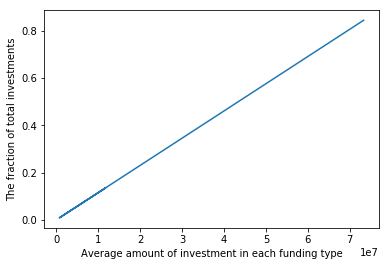

In [65]:
#A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type
import matplotlib.pyplot as plt
plt.plot([958694.47, 11748914.31, 719818.0, 73308593.03],[0.011, 0.135, 0.008, 0.845])
#angel, venture, seed, and private equity
plt.ylabel('The fraction of total investments')
plt.xlabel('Average amount of investment in each funding type')
plt.show()

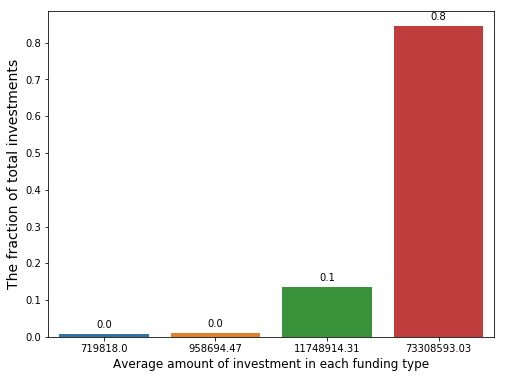

In [68]:
#A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Avg_amount_eachGivenFT = [958694.47, 11748914.31, 719818.0, 73308593.03]
Fraction=[0.011, 0.135, 0.008, 0.845]
df = pd.DataFrame({"Avg_amount_eachGivenFT":Avg_amount_eachGivenFT, "Fraction":Fraction})
plt.figure(figsize=(8, 6))

splot=sns.barplot(x="Avg_amount_eachGivenFT",y="Fraction",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Average amount of investment in each funding type", size=12)
plt.ylabel("The fraction of total investments", size=14)
plt.savefig(r"C:\Users\awx5324225\Desktop\Plot1.png")

In [70]:
#df_req
df_req['country_code'] = df_req.index
print(df_req)
c=list()
for i in df_req.raised_amount_usd:
    value=str(i).replace(',', '.')
    c.append(float(value))
print(c)
d=list(df_req.country_code)
print(d)

              raised_amount_usd country_code
country_code                                
USA                4.225208e+11          USA
CHN                3.983542e+10          CHN
GBR                2.024563e+10          GBR
IND                1.439186e+10          IND
CAN                9.583332e+09          CAN
FRA                7.259537e+09          FRA
ISR                6.907515e+09          ISR
DEU                6.346960e+09          DEU
JPN                3.363677e+09          JPN
SWE                3.254953e+09          SWE
[422520842796.0, 39835418773.0, 20245627416.0, 14391858718.0, 9583332317.0, 7259536732.0, 6907514579.0, 6346959822.0, 3363676611.0, 3254952563.0]
['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN', 'SWE']


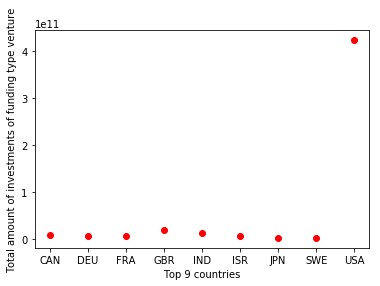

In [71]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT by scatter plot
import matplotlib.pyplot as plt
plt.plot(['USA','GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN','SWE'],[422520842796.0, 20245627416.0, 14391858718.0, 9583332317.0, 7259536732.0, 6907514579.0, 6346959822.0, 3363676611.0,3254952563.0],'ro')
plt.ylabel('Total amount of investments of funding type venture')
plt.xlabel('Top 9 countries')
plt.show()
plt.savefig(r"C:\Users\awx5324225\Desktop\Plot2.png")
#China is removed as it was surely coming under top 3 countries but is not an english speaking country  as suitable for Spark Funds

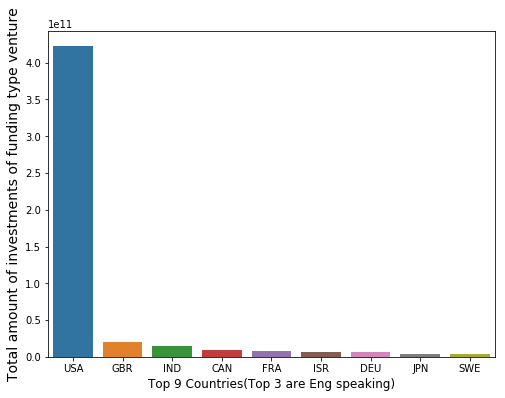

In [72]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT by Bar graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Countries = ['USA','GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN','SWE']
Total_Investments=[422520842796.0, 20245627416.0, 14391858718.0, 9583332317.0, 7259536732.0, 6907514579.0, 6346959822.0, 3363676611.0,3254952563.0]

df = pd.DataFrame({"Countries":Countries, "Total_Investments":Total_Investments})
plt.figure(figsize=(8, 6))
sns.barplot(x="Countries",y="Total_Investments",data=df)
plt.xlabel("Top 9 Countries(Top 3 are Eng speaking)", size=12)
plt.ylabel("Total amount of investments of funding type venture", size=14)
plt.savefig(r"C:\Users\awx5324225\Desktop\Plot2.png")

   Top1  Top2  Top3 Countries
0  8243  7849  5156       USA
1   507   433   318       GBR
2   281   130    77       IND


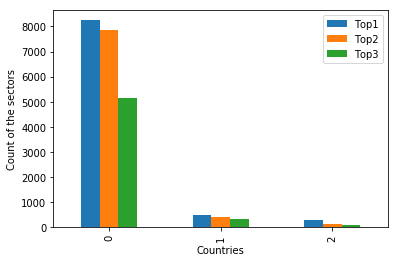

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

data = [[USA_count1,USA_count2,USA_count3,'USA'], 
        [GBR_count1,GBR_count2,GBR_count3,'GBR'], 
        [IND_count1,IND_count2,IND_count3,'IND']] 
  
# dataframe created with 
# the above data array 
df = pd.DataFrame(data, columns = ['Top1', 'Top2',  
                                    'Top3','Countries'] )

print(df)


df.plot.bar()
plt.xlabel('Countries') 
plt.ylabel("Count of the sectors")
plt.show()
plt.savefig(r"C:\Users\awx5324225\Desktop\Plot3.png")

In [54]:
#For 0 i.e. USA Top1= Others 
#For 0 i.e. USA Top2= Cleantech / Semiconductors
#For 0 i.e. USA Top3= Social, Finance, Analytics, Advertising

#For 1 i.e. GBR Top1= Others
#For 1 i.e. GBR Top2= Cleantech / Semiconductors
#For 1 i.e. GBR Top3= Social, Finance, Analytics, Advertising

#For 2 i.e. IND Top1= Others
#For 2 i.e. IND Top2= News, Search and Messaging
#For 2 i.e. IND Top3= Social, Finance, Analytics, Advertising